## Objetivos:

1. **Carga de Datos**:
   - Importar bibliotecas necesarias (pandas, numpy, seaborn y matplotlib) y cargar las matrices de confusión y los resultados desde archivos en formato Feather.

2. **Preprocesamiento de Nombres de Modelos**:
   - Simplificar los nombres de los modelos para facilitar la visualización extrayendo una parte específica de los nombres originales.

3. **Exploración de Datos**:
   - Mostrar la forma y las columnas del conjunto de datos `res` para verificar su estructura y contenido.

4. **Configuración de Estilo de Visualización**:
   - Establecer un tema para las visualizaciones utilizando la biblioteca Seaborn.

5. **Definición de Función para Gráficos de Métricas**:
   - Crear una función `plot_metric` que genere gráficos de barras para las métricas seleccionadas (F1-SCORE, PRECISION, RECALL) filtrando los datos según la métrica y el conjunto de datos.

6. **Generación de Gráficos de Métricas Globales**:
   - Filtrar y graficar las métricas F1, precisión y recall para el conjunto de prueba, guardando cada gráfico en un archivo.

7. **Definición de Función para Gráficos por Modelo**:
   - Crear una función `plot_model` que genere gráficos de barras para diferentes métricas de un modelo específico (excluyendo SUPPORT), permitiendo la comparación de métricas para diferentes clases.

8. **Generación de Gráficos por Modelo**:
   - Llamar a la función `plot_model` para varios modelos específicos y guardar cada gráfico resultante en un archivo.

Visualización comprensible y comparativa del rendimiento de diferentes modelos de clasificación en base a diversas métricas.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
cmx=confusion_matrixes=pd.read_feather("data/confusion_matrixes.feather")
replaced=cmx["MODEL"].str.extract(r"mirluvams/(\w+-\w+)-.+") #shorten names to plot easier
cmx["MODEL"]=replaced.where(~replaced.isna(), cmx["MODEL"], axis=0)

In [3]:
res=results=pd.read_feather("data/results.feather")
replaced=res["MODEL"].str.extract(r"mirluvams/(\w+-\w+)-.+")
res["MODEL"]=replaced.where(~replaced.isna(), res["MODEL"], axis=0)

In [4]:
res.shape

(450, 5)

In [5]:
res.columns

Index(['MODEL', 'SLICE', 'METRIC', 'CLASS', 'VALUE'], dtype='object')

In [6]:
res

,MODEL,SLICE,METRIC,CLASS,VALUE
0,swinv2-base,train,PRECISION,INACTIVE,0.967367
1,swinv2-base,train,RECALL,INACTIVE,0.934370
2,swinv2-base,train,F1-SCORE,INACTIVE,0.950582
3,swinv2-base,train,SUPPORT,INACTIVE,2316.000000
4,swinv2-base,train,PRECISION,WITH_EXPLOSION,0.943775
...,...,...,...,...,...
445,y_median,total,PRECISION,WEIGHTED_AVG,0.205018
446,y_median,total,RECALL,WEIGHTED_AVG,0.452789
447,y_median,total,F1-SCORE,WEIGHTED_AVG,0.282241
448,y_median,total,SUPPORT,WEIGHTED_AVG,18481.000000


In [7]:

sns.set_theme(style="darkgrid", palette="viridis")

In [8]:
def plot_metric(metric, label=None):
    filtered=res[(res["SLICE"]=="test") & (res["METRIC"]==metric)]
    f, ax = plt.subplots(figsize=(12, 7))
    ax=sns.barplot(y="MODEL", x="VALUE", data=filtered, hue="CLASS", orient="h", ax=ax)
    if label is not None:
        plt.xlabel(label)
    plt.ylabel("Modelo")
    return filtered[["MODEL", "SLICE", "CLASS", "VALUE"]]

In [9]:
filtered=res[(res["METRIC"]=="ACCURACY")]

In [10]:
print("Accuracy")
filtered[["MODEL", "SLICE", "VALUE"]].pivot(index="MODEL", columns=["SLICE"], values=["VALUE"])

Accuracy


VALUE                    
SLICE            test     total     train
MODEL                                    
beit-base    0.851812  0.889779  0.894000
swinv2-base  0.858302  0.949137  0.959235
swinv2-tiny  0.856679  0.878307  0.880712
vit-base     0.853975  0.980953  0.995070
y_mean       0.452677  0.452789  0.452802
y_median     0.452677  0.452789  0.452802

<Axes: xlabel='VALUE', ylabel='MODEL'>

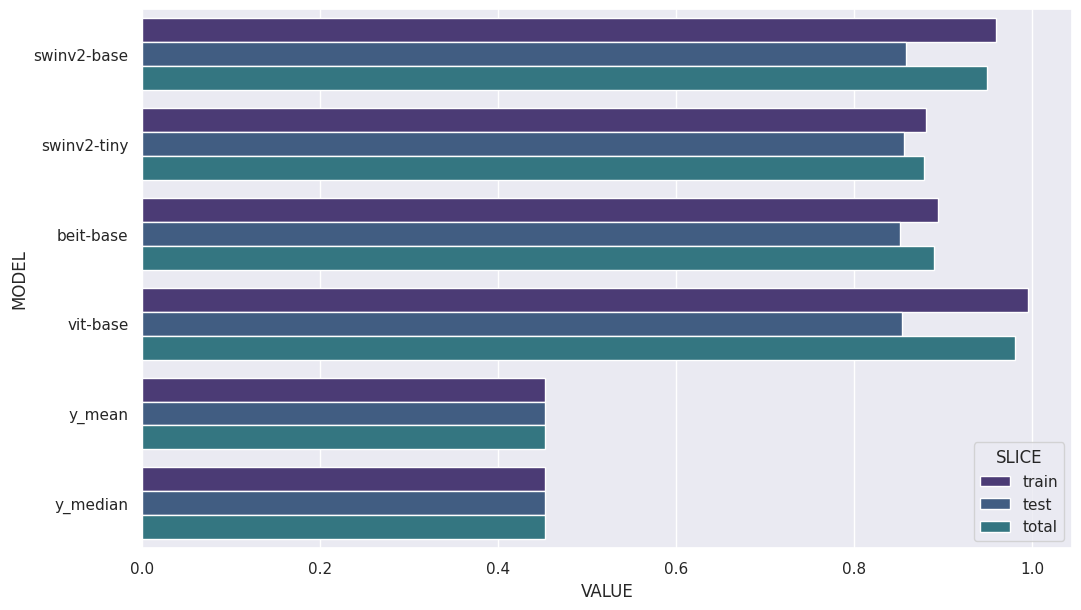

In [11]:
f, ax = plt.subplots(figsize=(12, 7))
sns.barplot(y="MODEL", x="VALUE", data=filtered, hue="SLICE", orient="h", ax=ax)

F1


VALUE                                                  \
CLASS        INACTIVE MACRO_AVG WEIGHTED_AVG WITH_EXPLOSION WITH_FUME   
MODEL                                                                   
beit-base    0.787500  0.692423     0.844148       0.233333  0.863085   
swinv2-base  0.817248  0.717791     0.852869       0.298507  0.867470   
swinv2-tiny  0.807547  0.751907     0.854140       0.447368  0.862254   
vit-base     0.814516  0.746878     0.853005       0.425532  0.868957   
y_mean       0.000000  0.155808     0.282123       0.000000  0.623232   
y_median     0.000000  0.155808     0.282123       0.000000  0.623232   

                                     
CLASS       WITH_FUME_AND_EXPLOSION  
MODEL                                
beit-base                  0.885774  
swinv2-base                0.887937  
swinv2-tiny                0.890459  
vit-base                   0.878505  
y_mean                     0.000000  
y_median                   0.000000

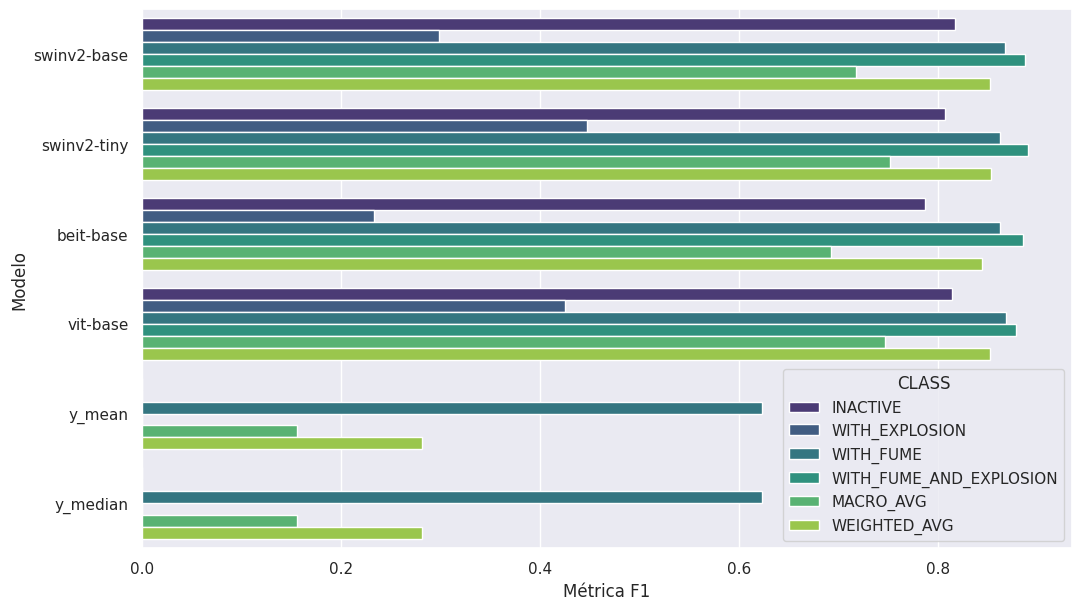

In [12]:
print("F1")
filtered=plot_metric("F1-SCORE", "Métrica F1")
plt.savefig("metrics/f1_global.png")
filtered.pivot(index="MODEL", columns=["CLASS"], values=["VALUE"])

Precisión


VALUE                                                  \
CLASS        INACTIVE MACRO_AVG WEIGHTED_AVG WITH_EXPLOSION WITH_FUME   
MODEL                                                                   
beit-base    0.851351  0.815264     0.848790       0.700000  0.835570   
swinv2-base  0.868996  0.796016     0.854669       0.588235  0.834437   
swinv2-tiny  0.786765  0.796850     0.854458       0.653846  0.860714   
vit-base     0.848739  0.760097     0.853093       0.454545  0.847727   
y_mean       0.000000  0.113169     0.204917       0.000000  0.452677   
y_median     0.000000  0.113169     0.204917       0.000000  0.452677   

                                     
CLASS       WITH_FUME_AND_EXPLOSION  
MODEL                                
beit-base                  0.874136  
swinv2-base                0.892396  
swinv2-tiny                0.886076  
vit-base                   0.889374  
y_mean                     0.000000  
y_median                   0.000000

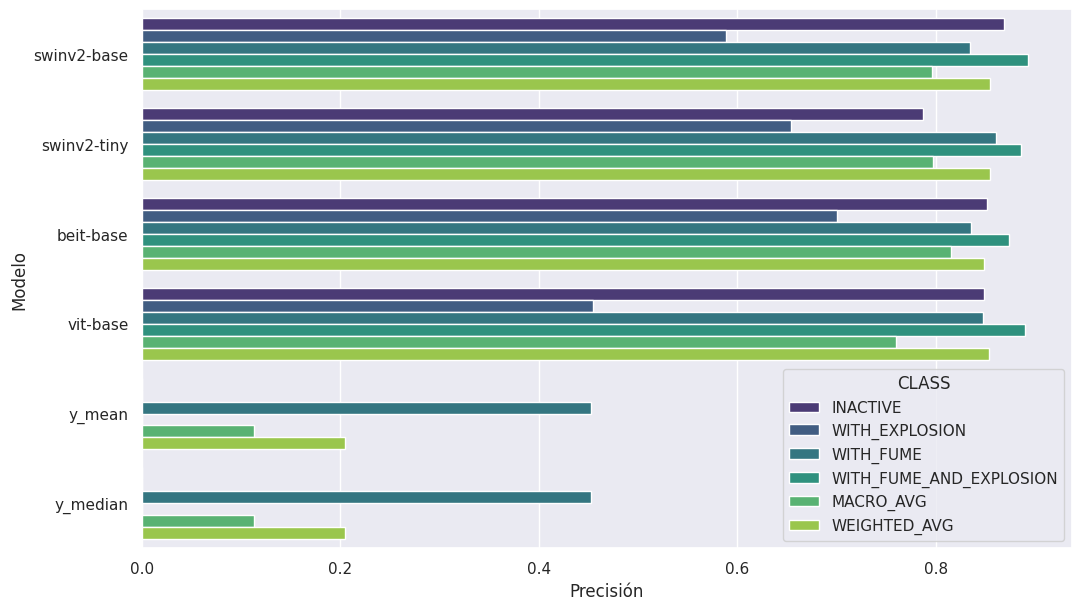

In [13]:
print("Precisión")
filtered=plot_metric("PRECISION", "Precisión")
plt.savefig("metrics/precision_global.png")
filtered.pivot(index="MODEL", columns=["CLASS"], values=["VALUE"])

Exhaustividad


VALUE                                                  \
CLASS        INACTIVE MACRO_AVG WEIGHTED_AVG WITH_EXPLOSION WITH_FUME   
MODEL                                                                   
beit-base    0.732558  0.665690     0.851812           0.14  0.892473   
swinv2-base  0.771318  0.689517     0.858302           0.20  0.903226   
swinv2-tiny  0.829457  0.732036     0.856679           0.34  0.863799   
vit-base     0.782946  0.735530     0.853975           0.40  0.891278   
y_mean       0.000000  0.250000     0.452677           0.00  1.000000   
y_median     0.000000  0.250000     0.452677           0.00  1.000000   

                                     
CLASS       WITH_FUME_AND_EXPLOSION  
MODEL                                
beit-base                  0.897727  
swinv2-base                0.883523  
swinv2-tiny                0.894886  
vit-base                   0.867898  
y_mean                     0.000000  
y_median                   0.000000

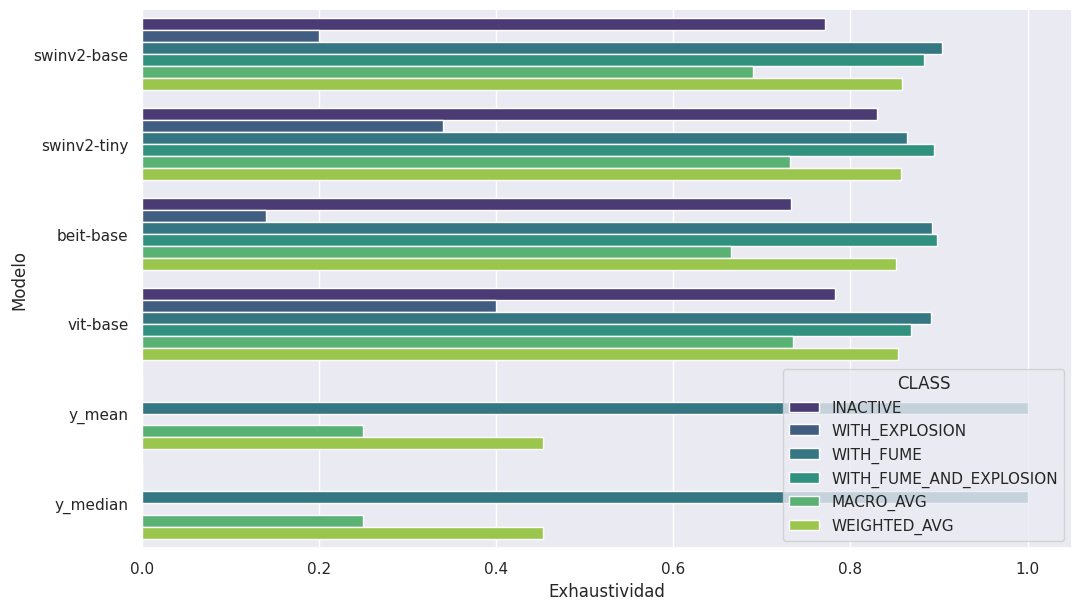

In [14]:
print("Exhaustividad")
filtered=plot_metric("RECALL", "Exhaustividad")
plt.savefig("metrics/recall_global.png")
filtered.pivot(index="MODEL", columns=["CLASS"], values=["VALUE"])

In [15]:

sns.set_theme(style="darkgrid",palette=sns.color_palette("cividis", 7))
def plot_model(model):
    filtered=res[(res["MODEL"]==model) & (res["SLICE"]=="test") & (res["METRIC"]!="SUPPORT")]
    f, ax = plt.subplots(figsize=(12, 7))
    ax=sns.barplot(y="METRIC", x="VALUE", data=filtered, hue="CLASS", orient="h", ax=ax)
    plt.xlabel("Valor")
    plt.ylabel("Métrica")
    plt.title(model)
    return filtered

VALUE                                                            \
CLASS       GENERAL  INACTIVE MACRO_AVG WEIGHTED_AVG WITH_EXPLOSION WITH_FUME   
METRIC                                                                          
ACCURACY   0.858302       NaN       NaN          NaN            NaN       NaN   
F1-SCORE        NaN  0.817248  0.717791     0.852869       0.298507  0.867470   
PRECISION       NaN  0.868996  0.796016     0.854669       0.588235  0.834437   
RECALL          NaN  0.771318  0.689517     0.858302       0.200000  0.903226   

                                   
CLASS     WITH_FUME_AND_EXPLOSION  
METRIC                             
ACCURACY                      NaN  
F1-SCORE                 0.887937  
PRECISION                0.892396  
RECALL                   0.883523

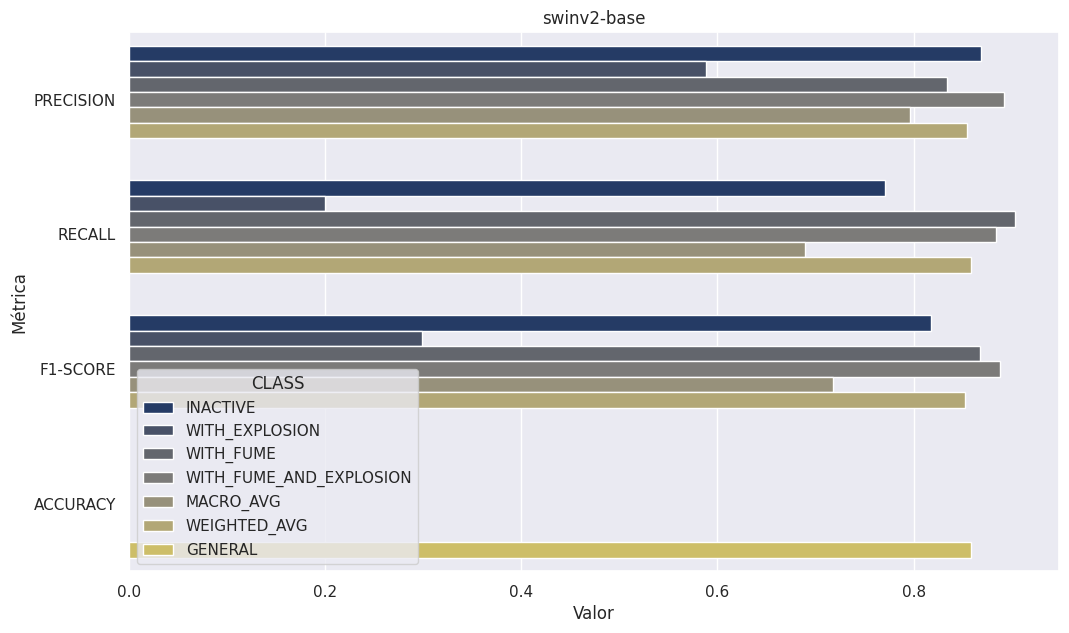

In [16]:
filtered=plot_model("swinv2-base")
plt.savefig("metrics/swinv2-base-metrics.png")
filtered.pivot(index="METRIC", columns=["CLASS"], values=["VALUE"])

VALUE                                                            \
CLASS       GENERAL  INACTIVE MACRO_AVG WEIGHTED_AVG WITH_EXPLOSION WITH_FUME   
METRIC                                                                          
ACCURACY   0.856679       NaN       NaN          NaN            NaN       NaN   
F1-SCORE        NaN  0.807547  0.751907     0.854140       0.447368  0.862254   
PRECISION       NaN  0.786765  0.796850     0.854458       0.653846  0.860714   
RECALL          NaN  0.829457  0.732036     0.856679       0.340000  0.863799   

                                   
CLASS     WITH_FUME_AND_EXPLOSION  
METRIC                             
ACCURACY                      NaN  
F1-SCORE                 0.890459  
PRECISION                0.886076  
RECALL                   0.894886

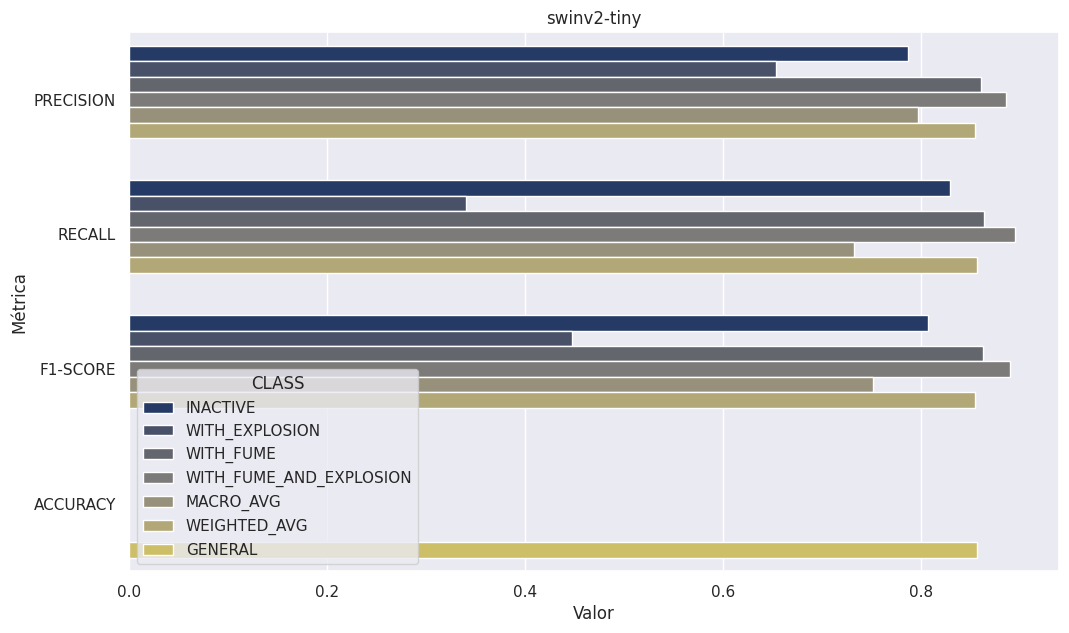

In [17]:
filtered=plot_model("swinv2-tiny")
plt.savefig("metrics/swinv2-tiny-metrics.png")
filtered.pivot(index="METRIC", columns=["CLASS"], values=["VALUE"])

VALUE                                                            \
CLASS       GENERAL  INACTIVE MACRO_AVG WEIGHTED_AVG WITH_EXPLOSION WITH_FUME   
METRIC                                                                          
ACCURACY   0.851812       NaN       NaN          NaN            NaN       NaN   
F1-SCORE        NaN  0.787500  0.692423     0.844148       0.233333  0.863085   
PRECISION       NaN  0.851351  0.815264     0.848790       0.700000  0.835570   
RECALL          NaN  0.732558  0.665690     0.851812       0.140000  0.892473   

                                   
CLASS     WITH_FUME_AND_EXPLOSION  
METRIC                             
ACCURACY                      NaN  
F1-SCORE                 0.885774  
PRECISION                0.874136  
RECALL                   0.897727

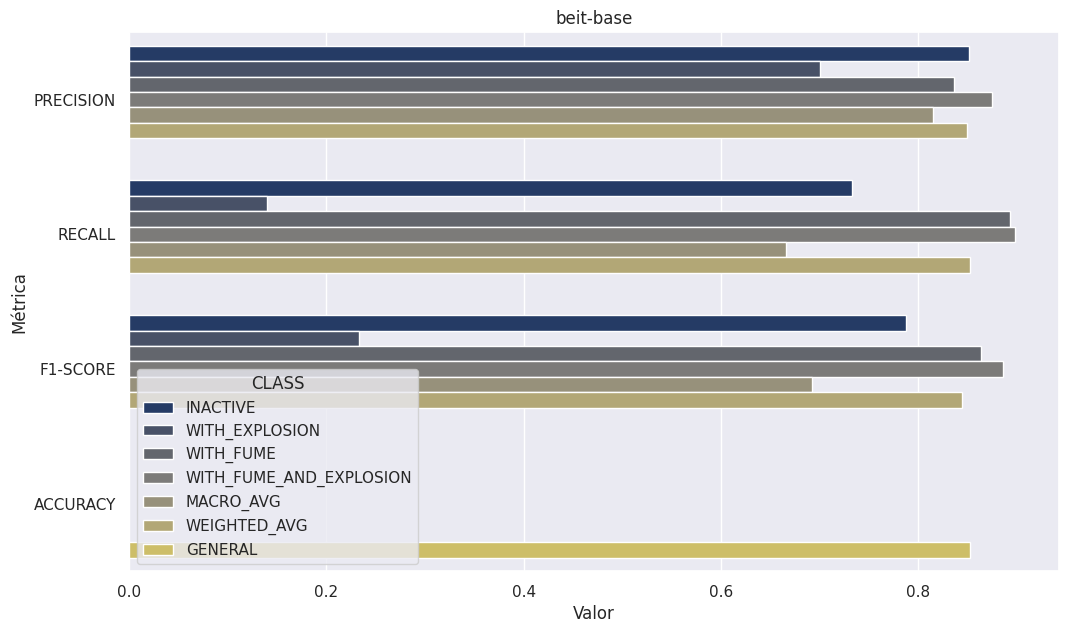

In [18]:
filtered=plot_model("beit-base")
plt.savefig("metrics/beit-base-metrics.png")
filtered.pivot(index="METRIC", columns=["CLASS"], values=["VALUE"])

VALUE                                                            \
CLASS       GENERAL  INACTIVE MACRO_AVG WEIGHTED_AVG WITH_EXPLOSION WITH_FUME   
METRIC                                                                          
ACCURACY   0.853975       NaN       NaN          NaN            NaN       NaN   
F1-SCORE        NaN  0.814516  0.746878     0.853005       0.425532  0.868957   
PRECISION       NaN  0.848739  0.760097     0.853093       0.454545  0.847727   
RECALL          NaN  0.782946  0.735530     0.853975       0.400000  0.891278   

                                   
CLASS     WITH_FUME_AND_EXPLOSION  
METRIC                             
ACCURACY                      NaN  
F1-SCORE                 0.878505  
PRECISION                0.889374  
RECALL                   0.867898

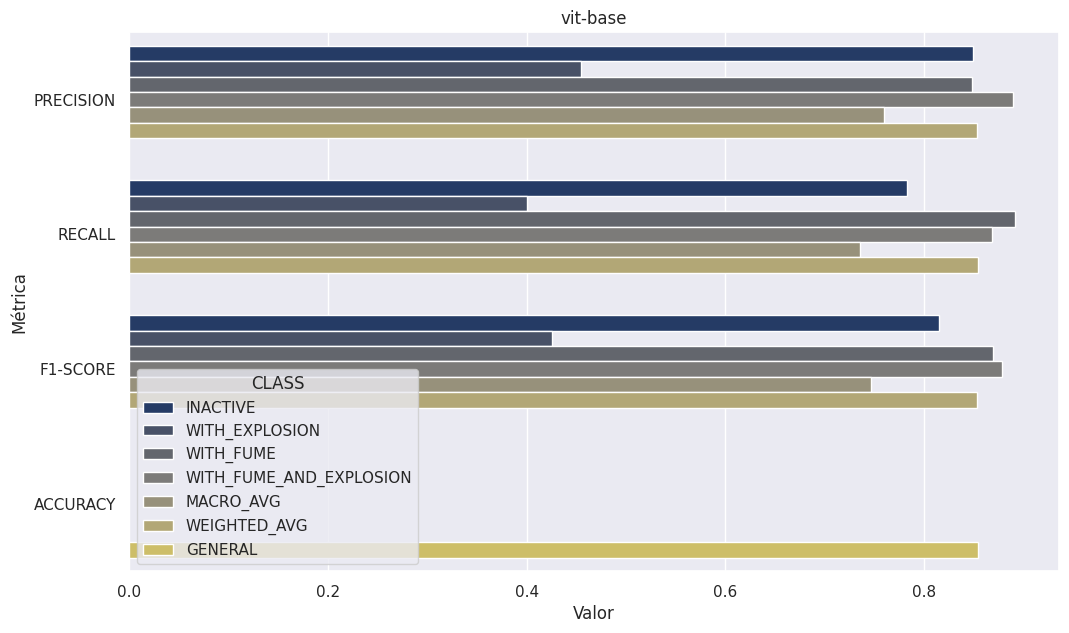

In [19]:
filtered=plot_model("vit-base")
plt.savefig("metrics/vit-base-metrics.png")
filtered.pivot(index="METRIC", columns=["CLASS"], values=["VALUE"])

In [20]:
cmx

,MODEL,SLICE,MATRIX
0,swinv2-base,train,"[2164, 2, 142, 8, 4, 235, 51, 162, 46, 3, 7424..."
1,swinv2-base,test,"[199, 0, 58, 1, 1, 10, 16, 23, 26, 4, 756, 51,..."
2,swinv2-base,total,"[2363, 2, 200, 9, 5, 245, 67, 185, 72, 7, 8180..."
3,swinv2-tiny,train,"[2023, 5, 276, 12, 10, 129, 73, 240, 428, 12, ..."
4,swinv2-tiny,test,"[214, 0, 41, 3, 3, 17, 11, 19, 52, 3, 723, 59,..."
5,swinv2-tiny,total,"[2237, 5, 317, 15, 13, 146, 84, 259, 480, 15, ..."
6,beit-base,train,"[1929, 4, 374, 9, 9, 101, 83, 259, 230, 3, 695..."
7,beit-base,test,"[189, 0, 67, 2, 3, 7, 12, 28, 28, 1, 747, 61, ..."
8,beit-base,total,"[2118, 4, 441, 11, 12, 108, 95, 287, 258, 4, 7..."
9,vit-base,train,"[2308, 3, 5, 0, 1, 443, 0, 8, 4, 7, 7511, 9, 2..."


In [21]:
cmx.shape

(18, 3)

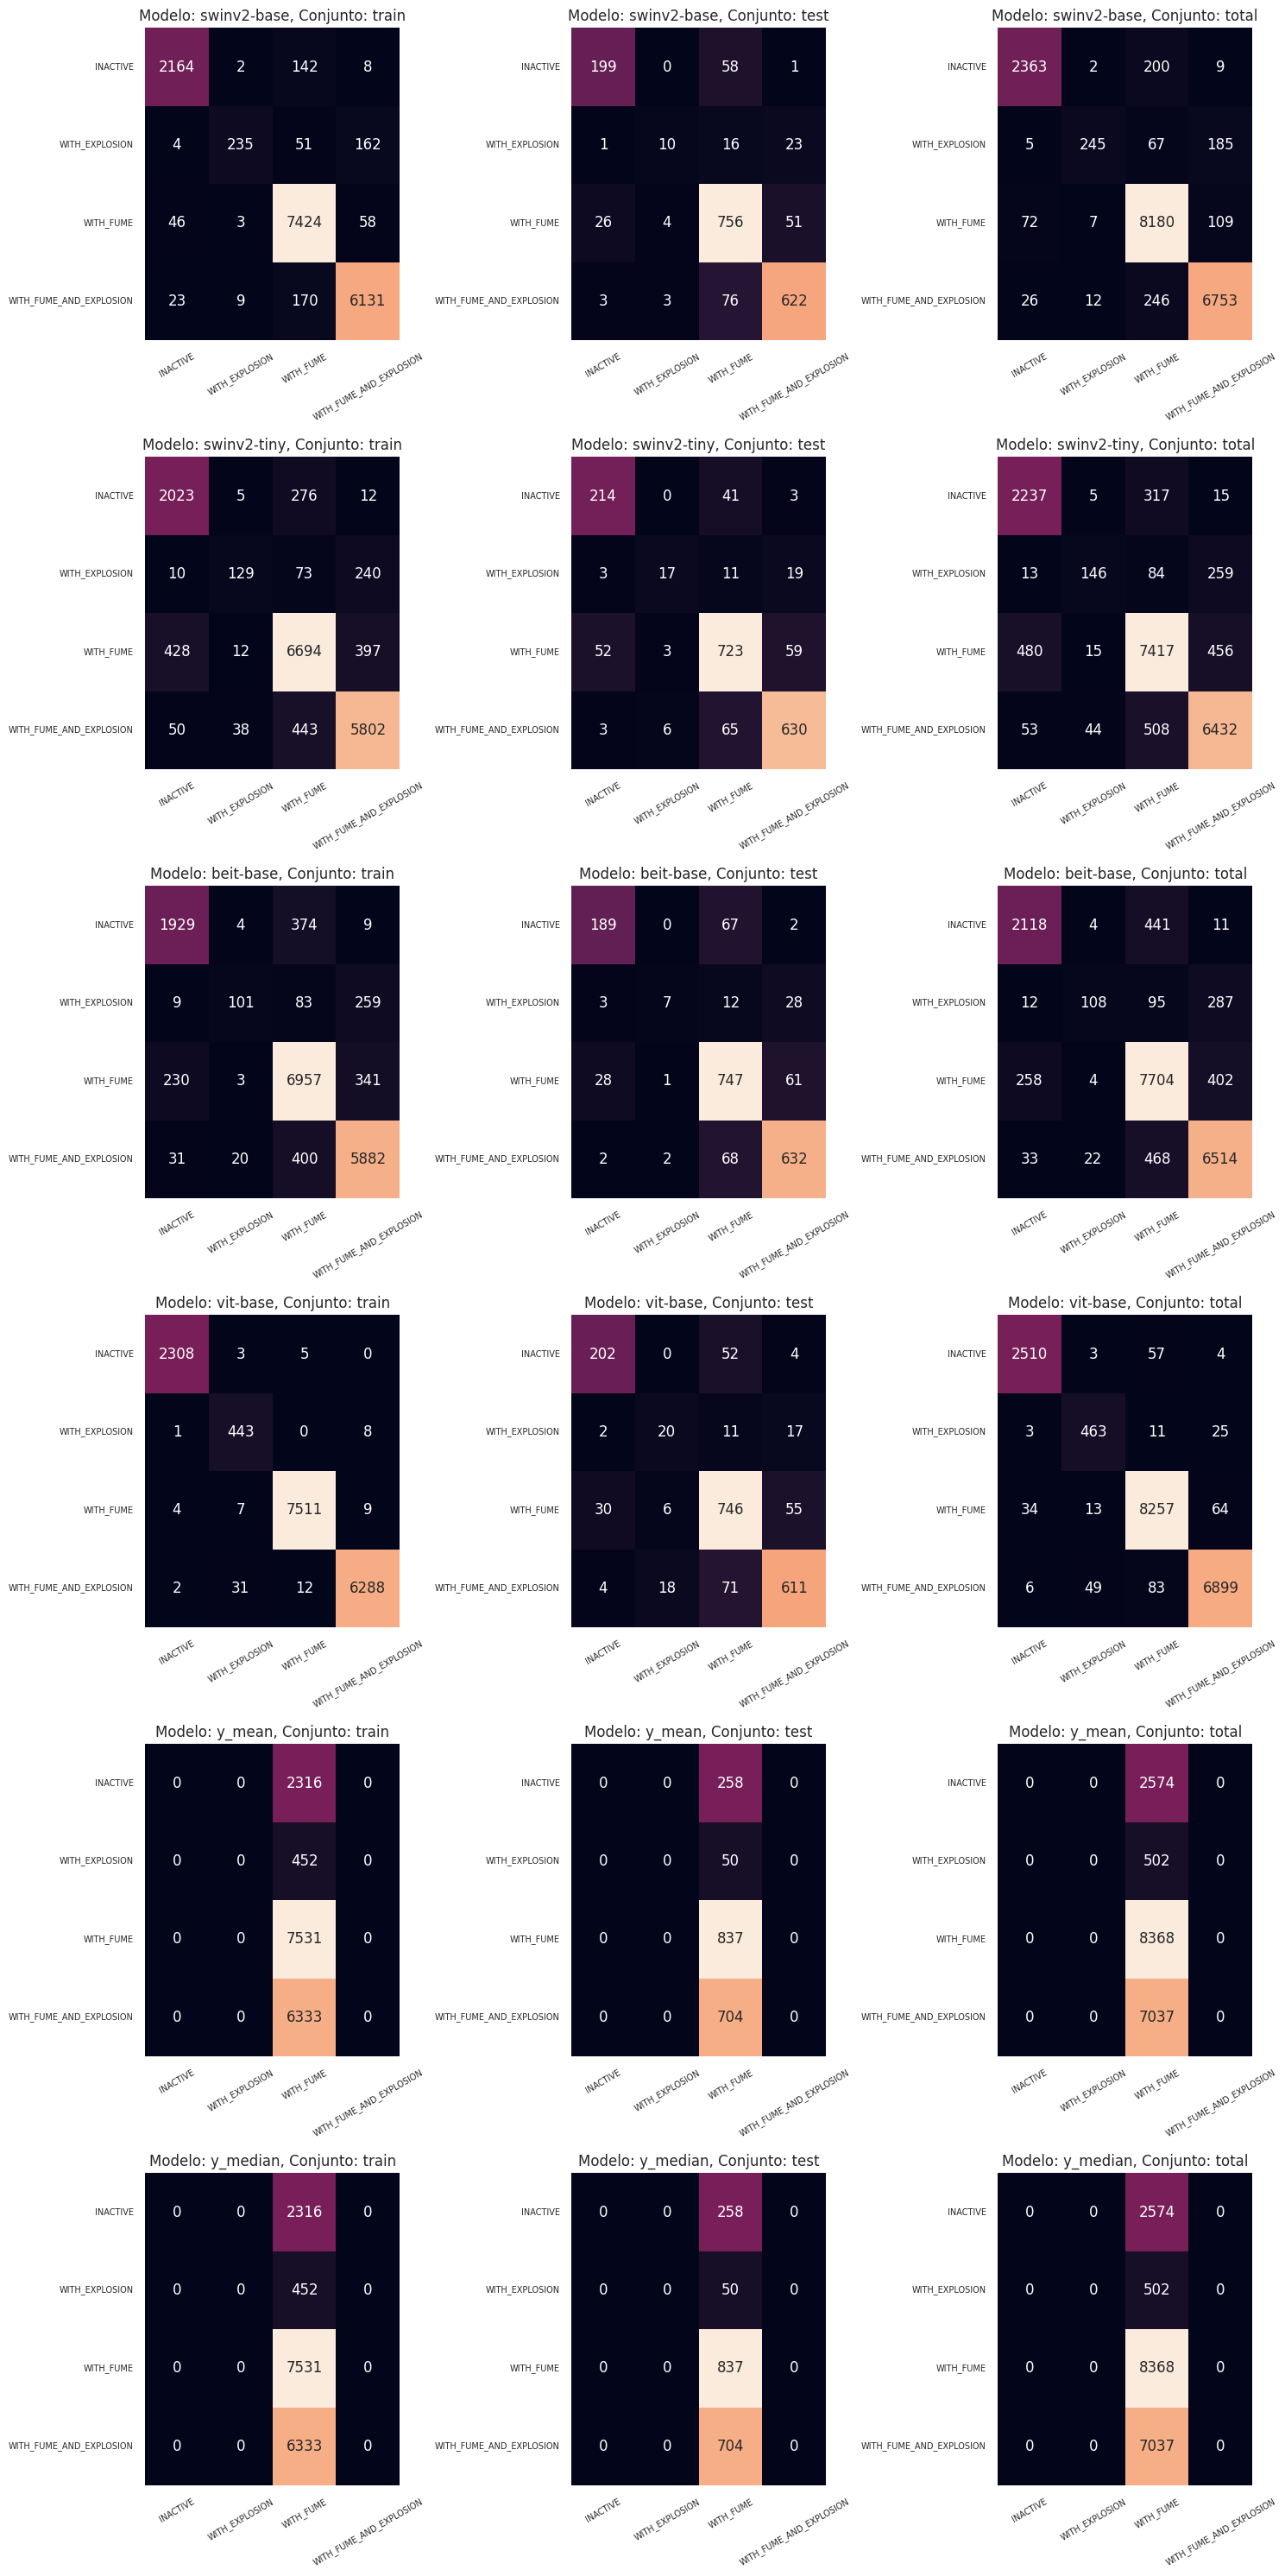

In [22]:

labels = ["INACTIVE", "WITH_EXPLOSION", "WITH_FUME", "WITH_FUME_AND_EXPLOSION"]

fig, axes = plt.subplots(6, 3, figsize=(15, 30))
sns.set_theme(style="darkgrid", palette=sns.color_palette("inferno", 7))

for idx, ax in enumerate(axes.flat):
    if idx < len(cmx):
        matrix_data = np.array(cmx.iloc[idx]['MATRIX']).reshape(4, 4)
        df_matrix = pd.DataFrame(matrix_data, index=labels, columns=labels)
        sns.heatmap(df_matrix, ax=ax, cbar=False, annot=True, fmt="g")
        ax.set_title(f"Modelo: {cmx.iloc[idx]['MODEL']}, Conjunto: {cmx.iloc[idx]['SLICE']}")
        ax.tick_params(axis='x', rotation=30, labelsize=7)
        ax.tick_params(axis='y', labelsize=7)
        ax.set_xlabel('')
        ax.set_ylabel('')
    else:
        fig.delaxes(ax)  # Remove extra subplots

plt.tight_layout()
